In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as  plt
from google.colab import drive

In [4]:
import pandas as pd

file_path = '/content/drive/My Drive/DA-Task2.xlsx'
df = pd.read_excel(file_path)
df.head()


,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [5]:
# Overview
df.info()

# Summary statistics
df.describe(include='all')

# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

,0
CAMPAIGN_NBR,100
ENGINE_SOURCE_PLANT,12
TRANSMISSION_SOURCE_PLANT,12
TRANSMISSION_TRACE_NBR,12
ENGINE_TRACE_NBR,12
OPTN_FAMLY_CERTIFICATION,10
TOTALCOST,6
OPTF_FAMLY_EMISSIOF_SYSTEM,5
CAUSAL_PART_NM,5
REPAIR_DLR_POSTAL_CD,2


In [20]:
# Drop unnecessary columns
df.drop(columns=['COMPLAINT_CD_CSI', 'CAMPAIGN_NBR', 'TRANSACTION_CNTR'], inplace=True)


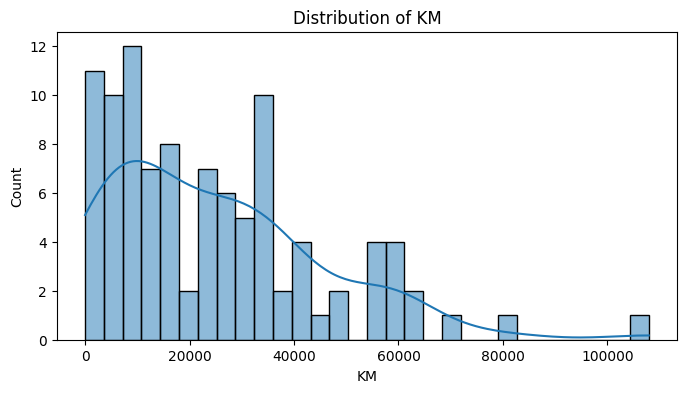

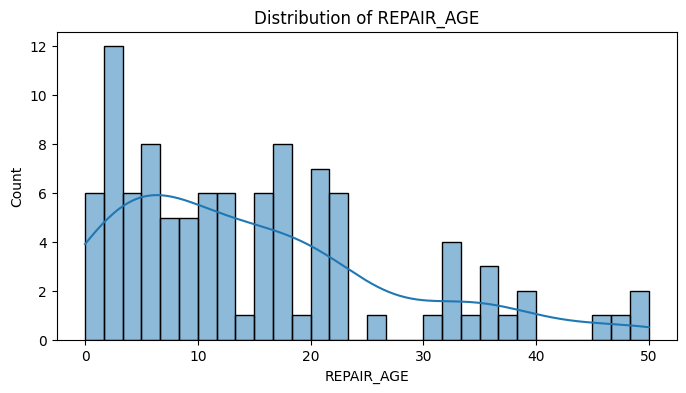

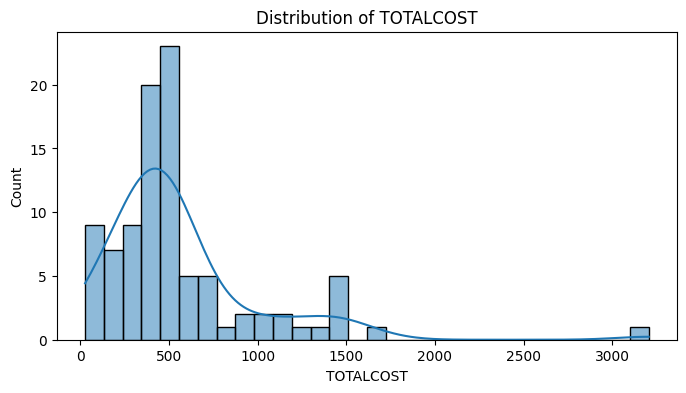

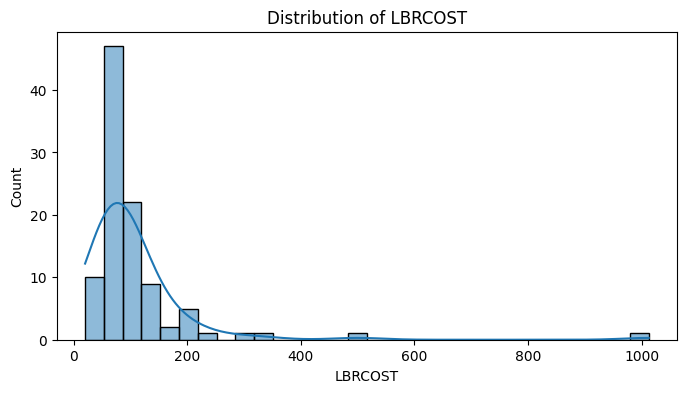

In [21]:
# Plot numerical features
numeric_cols = ['KM', 'REPAIR_AGE', 'TOTALCOST', 'LBRCOST']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sn.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

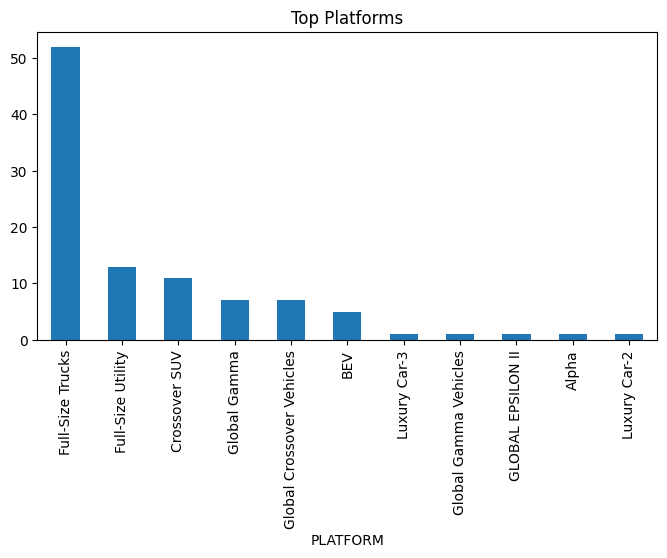

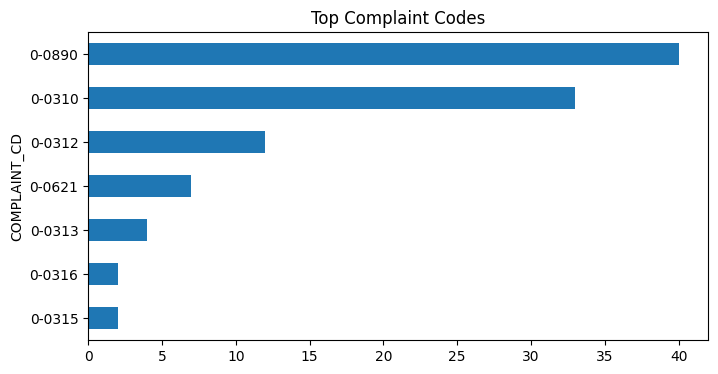

In [22]:
# Top Platforms
plt.figure(figsize=(8, 4))
df['PLATFORM'].value_counts().plot(kind='bar')
plt.title('Top Platforms')
plt.show()

# Top Complaint Codes
plt.figure(figsize=(8, 4))
df['COMPLAINT_CD'].value_counts().head(10).plot(kind='barh')
plt.title('Top Complaint Codes')
plt.gca().invert_yaxis()
plt.show()


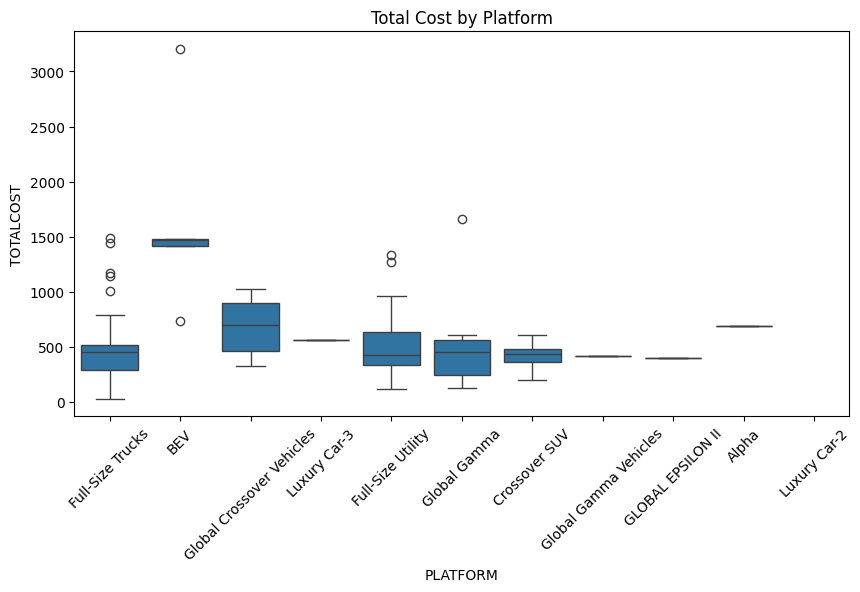

In [23]:
plt.figure(figsize=(10, 5))
sn.boxplot(x='PLATFORM', y='TOTALCOST', data=df)
plt.xticks(rotation=45)
plt.title('Total Cost by Platform')
plt.show()

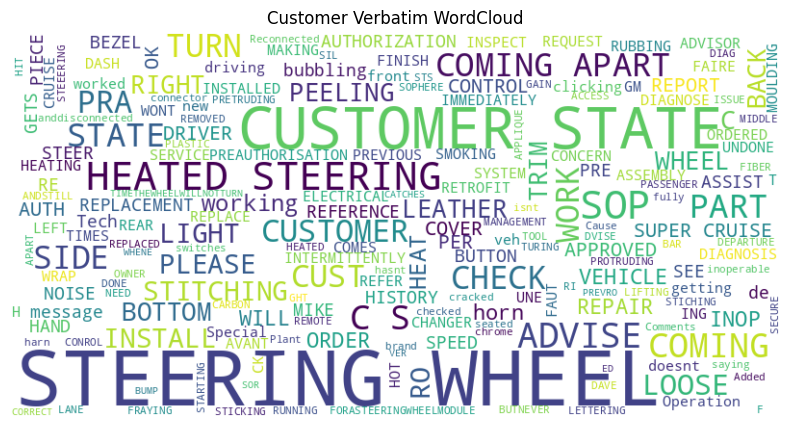

In [24]:
from wordcloud import WordCloud

# WordCloud for CUSTOMER_VERBATIM
text = ' '.join(df['CUSTOMER_VERBATIM'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Customer Verbatim WordCloud")
plt.show()


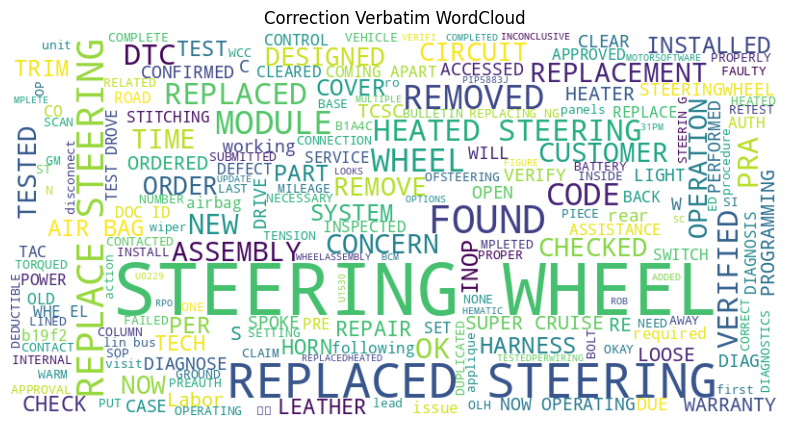

In [25]:
# WordCloud for CORRECTION_VERBATIM
text = ' '.join(df['CORRECTION_VERBATIM'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Correction Verbatim WordCloud")
plt.show()


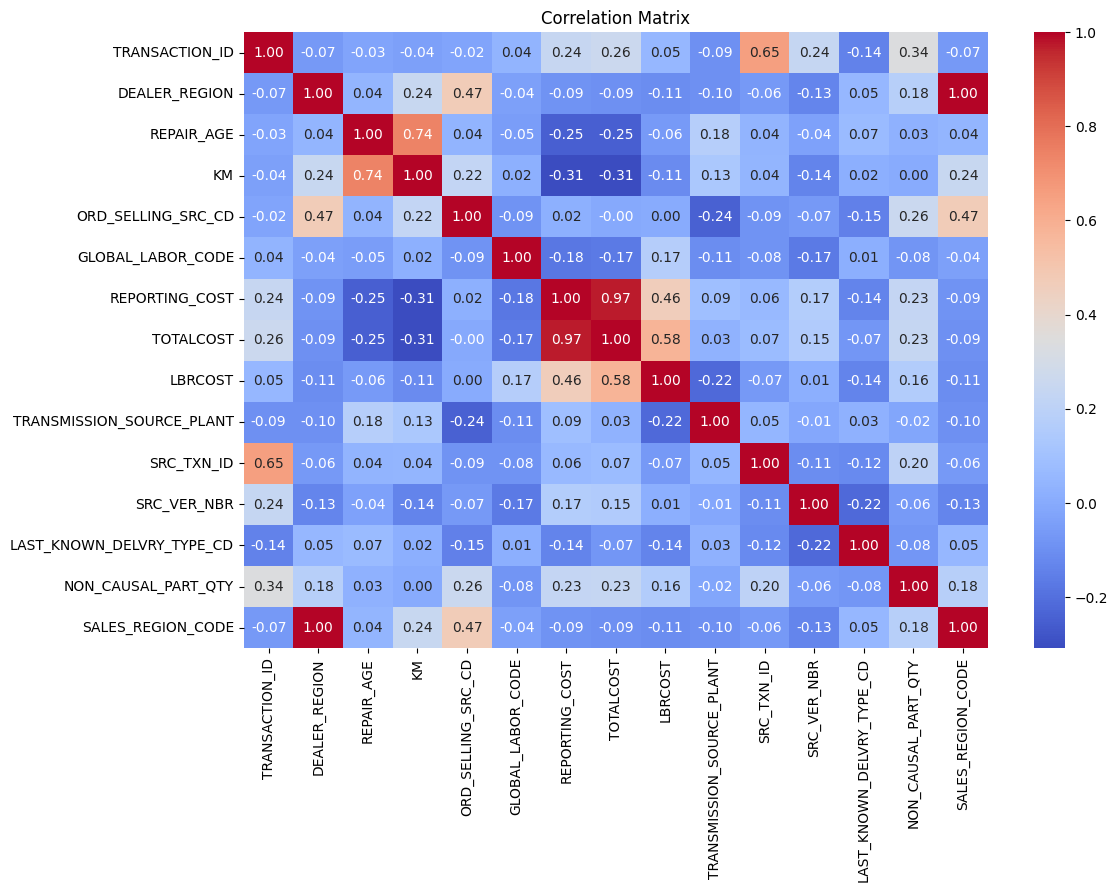

In [26]:
plt.figure(figsize=(12, 8))
sn.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


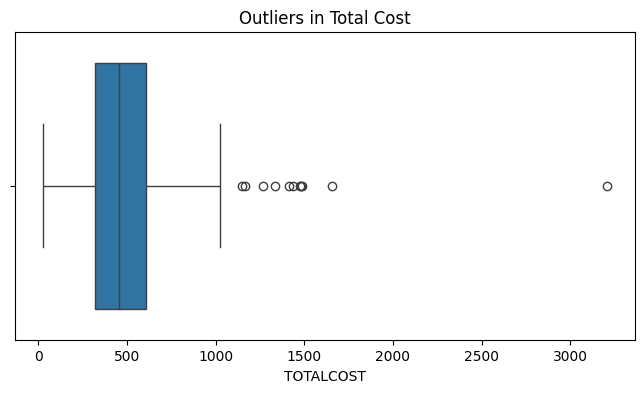

In [30]:
# Outliers in TOTALCOST
plt.figure(figsize=(8, 4))
sn.boxplot(x=df['TOTALCOST'])
plt.title('Outliers in Total Cost')
plt.show()


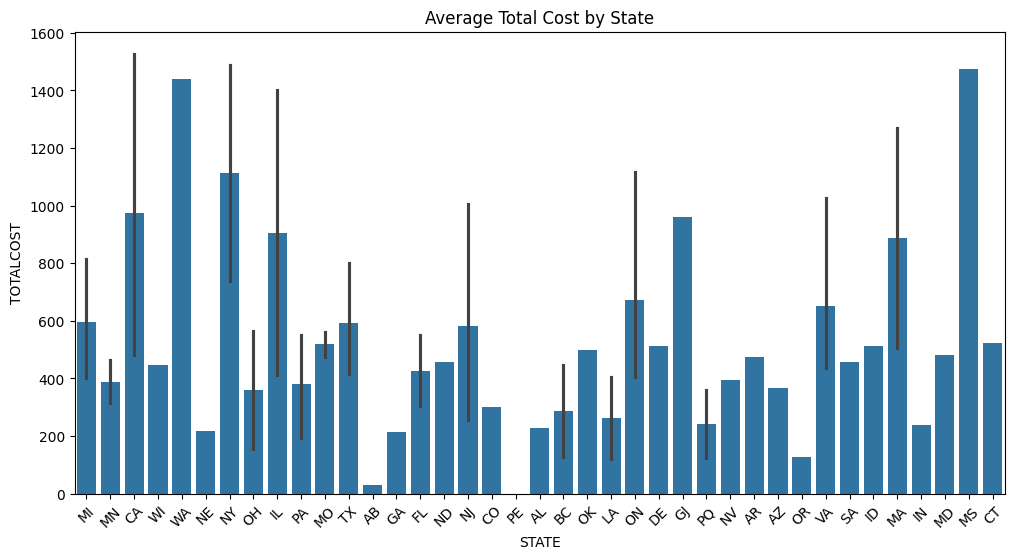

In [31]:
plt.figure(figsize=(12, 6))
sn.barplot(data=df, x='STATE', y='TOTALCOST', estimator='mean')
plt.title('Average Total Cost by State')
plt.xticks(rotation=45)
plt.show()


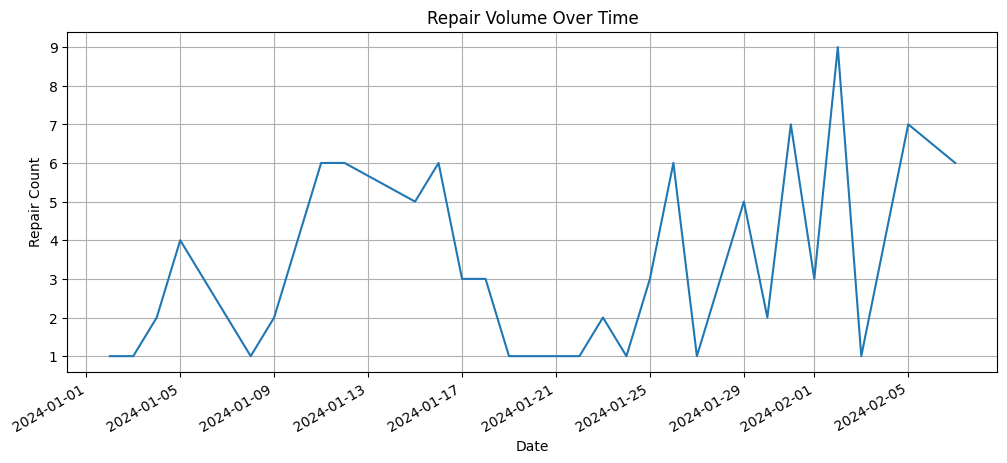

In [32]:
# Repairs over time
df['REPAIR_DATE'] = pd.to_datetime(df['REPAIR_DATE'])
df['REPAIR_DATE'].value_counts().sort_index().plot(kind='line', figsize=(12, 5))
plt.title("Repair Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Repair Count")
plt.grid()
plt.show()


In [17]:
# Save cleaned file back to Drive
df.to_excel('/content/drive/My Drive/DA-Task2-cleaned.xlsx', index=False)
